# **6.6: Sourcing & Analyzing Time Series Data**

In [ ]:
# Exporting the visualization
ax.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'cluster1.png'))

**This script contains the following:**
1. Importing your libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Federal Reserve Economic Data

#### 1. Importing your libraries and data

Before we start this analysis, we'll need a new library we haven't installed before—Quandl. Install Quandl using conda:

conda install quandl

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = '7LwuXwKAjwd2dpwymuhB'

In [3]:
# Importing the Federal Reserve Economic Data "	Federal Debt: Total Public Debt" variable.

data = quandl.get('FRED/GFDEBTN')

In [4]:
data.head(5)

,Value
Date,
1966-01-01,320999.0
1966-04-01,316097.0
1966-07-01,324748.0
1966-10-01,329319.0
1967-01-01,330947.0


In [5]:
data.shape

(224, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

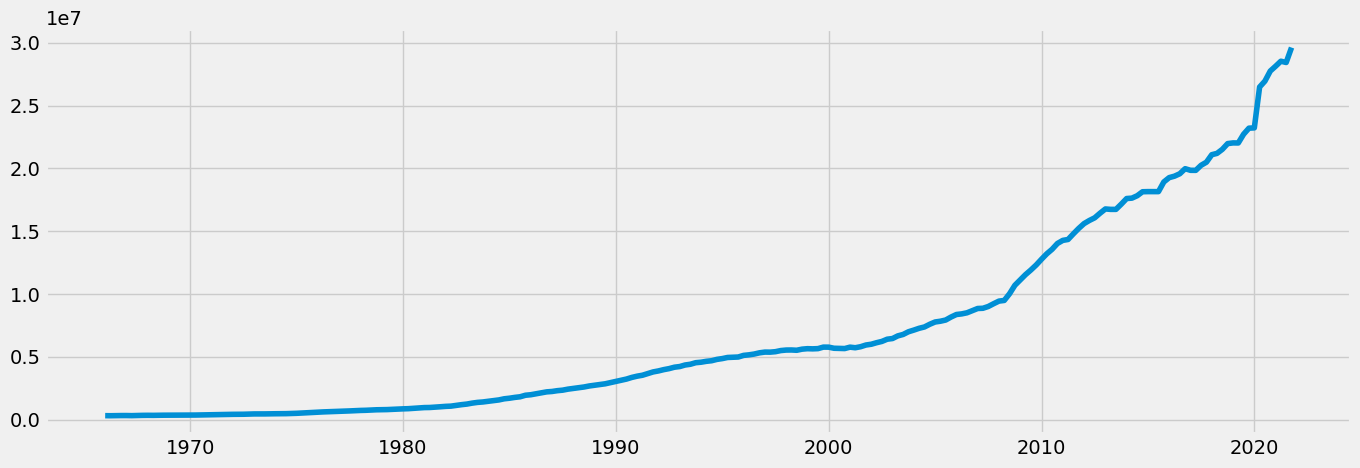

In [9]:
# Plot the data using matplotlib.

TimeSeries= plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

The data includes observations from around 1966 to 2023. it doesnt have any forecasted values.

In [14]:
# Set path
path = r'C:\Users\karya\Sourcing Open Data'

In [15]:
path

'C:\\Users\\karya\\Sourcing Open Data'

In [16]:
# Exporting the visualization
TimeSeries.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'Timeseries1.png'))

### **2. Subsetting, wrangling, and cleaning time-series data**

**Before moving straight ahead, let’s do some subsetting and wrangling to better prepare our data for the analysis ahead. For this example, we only need values after January first, 1980 and before (2020-Jan-31) The former due to the fact that economic conditions in the present are different than in the 50s to 80s, so we wouldn’t want that data incorrectly influencing our calculations, and the latter due to the fact that on (2020-Jan-31) the U.S outbreak was declared a public health emergency and an economic crisis started.** 

#### **To create this subset, we’ll first need to reset the index of the dataframe, making “Date” into a variable we can use to filter the data.**

In [17]:
# Reset index so that we can use the "Date" column as a filter

data_2 = data.reset_index()

In [18]:
data_2.head()

,Date,Value
0,1966-01-01,320999.0
1,1966-04-01,316097.0
2,1966-07-01,324748.0
3,1966-10-01,329319.0
4,1967-01-01,330947.0


#### **Now, we can create a new data_sub subset using the loc function and our “Date” column:**

In [19]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-01-31')]

In [20]:
data_sub.shape

(161, 2)

In [21]:
data_sub.head()

,Date,Value
56,1980-01-01,863451.0
57,1980-04-01,877614.0
58,1980-07-01,907701.0
59,1980-10-01,930210.0
60,1981-01-01,964531.0


#### **Once finished creating our subset, we need to reset our “Date” column as the index of the new dataframe. To do so, we need to use a special function from the datetime library**

In [22]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1980-01-01,863451.0
1980-04-01,877614.0
1980-07-01,907701.0
1980-10-01,930210.0
1981-01-01,964531.0


### **Success! We’ve successfully created our new subset and ensured that our “Date” column (in datetime format) is the index of the dataframe. Let’s try plotting our new subset to look at it visually:**

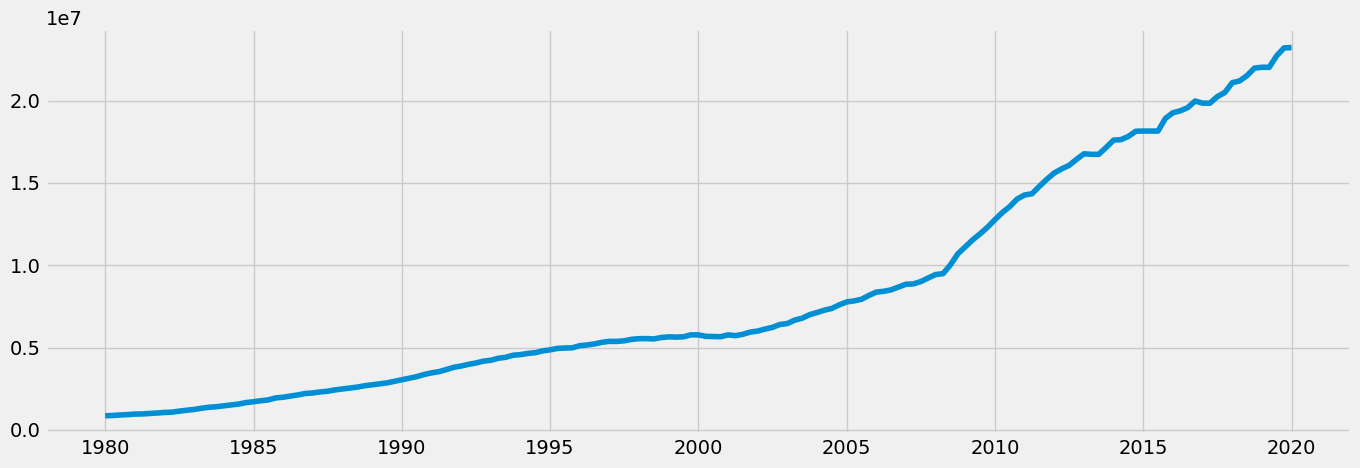

In [24]:
# Plot the new data set

Tseries= plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

#### **The visualization indicates that historically there has been a constant increase in the Federal Debt: Total Public Debt.**

In [25]:
# Exporting the visualization
Tseries.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'Timeseries2.png'))

#### **Finally, it’s time to do some basic data cleaning, mainly in the form of checking for ***missing*** and** ***duplicate values***

In [26]:
# Check for missing values (you shouldn't have any)

data.isnull().sum() 

Value    0
dtype: int64

In [27]:
# Check for duplicates

dups = data.duplicated()
dups.sum()

# No dups!

0

### **With that out of the way, it’s time to move on to our analysis!**

### **3. Time-series analysis: decomposition**

***Now that we know more about the different components that make up a time series, we need to look into how to separate those components and observe them on their own. This process is called decomposition.***

***In data being used for this task, the numbers are yearly 	Federal Debt: Total Public Debt (rather than daily or hourly), so there’s no need for smoothing.***

**As the data follows a linear path, so we can use an additive model to decompose the data.**

In [28]:
# **Decompose the time series using an additive model**

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [29]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

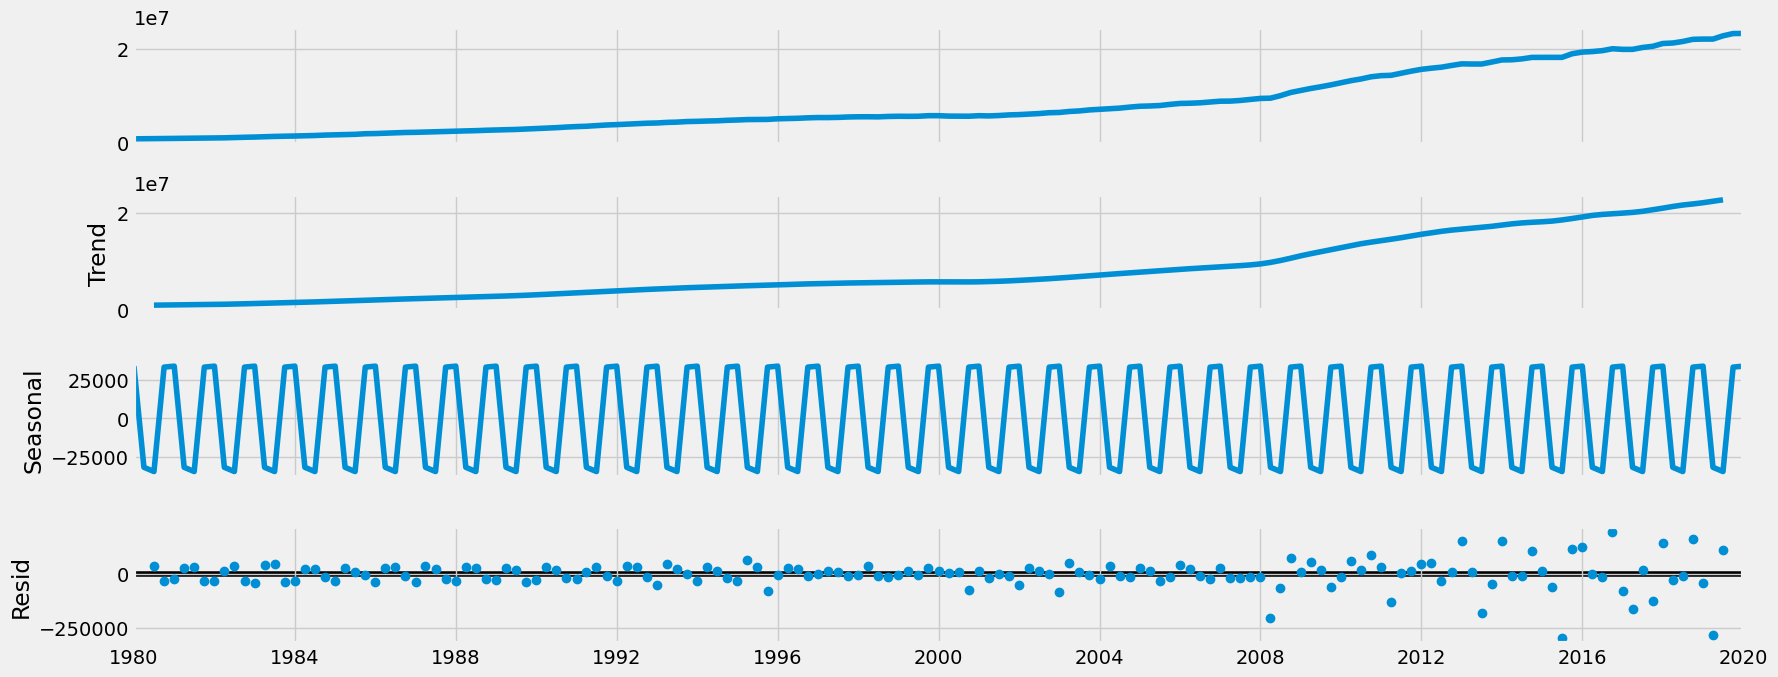

In [30]:
# Plot the separate components

Decomp= decomposition.plot()
plt.show()

In [32]:
# Exporting the visualization
Decomp.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'Decomposition.png'))

#### 1. The first chart in the figure above is the data itself (including all of its components). This is called the ***Level***.
#### 2. The second chart is the trend in the data, which indicates that there is an upward trend in the data. 
#### 3. The ***Level*** and ***Trend*** appears the same. It indicates that our data doesn't have much nois (and, thus, didn’t need to be smoothed).
#### 4. We can see from the decomposition that there is seasonality present in the data. Here, we can see seasonal fluctuations represented by a spikey         curve that changes at a regular interval. If we didn’t have any seasonality (which is rarely the case), the curve would be flat.
#### 5. The residual chart shows the nois of the data, which I think there isnt much nois in the data  (as the data points are clolsely centered around the zero). 

***It’s incredibly important that we don’t skip this step when conducting a time series analysis—without separating the trend and seasonality, we can’t be sure whether we’re working with a stationary or non-stationary time series (the presence of a trend and seasonality implies the series is non-stationary), and this knowledge is essential for creating an accurate forecast.***

**There are two main factors that could prove problematic when forecasting: non-stationarity and autocorrelation. We need to check for both of these before moving on with our forecast modeling. Let’s start by testing for stationarity!**

### **4. Testing for stationarity**

Why do we need to care about stationarity? Well, when it comes to forecasting, we need data with properties that don’t change; otherwise, we won’t have a reliable basis on which to build our forecast. Think about it this way: if the way the data’s changing is itself changing, then we have no way to predict how the data will evolve in the future.
##### ***We can only forecast if our time series data is stationary!***

### ***Dickey-Fuller test***

##### Null hypothesis: There is a unit root.
##### Alternative hypothesis: There is no unit root.

**Disprove the null = no unit root = stationary data = can proceed with forecast**

***Test statistic larger than critical value = can’t reject null hypothesis***

***Test statistic smaller than critical value = can reject null hypothesis***

In [33]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   2.118028
p-value                          0.998808
Number of Lags Used             13.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


**The results show that our Test Statistic (2.118028) is larger than the critiacl values at all the three significant levels of (1%) (5%) and (10%)**
**It means we can not reject the null hypothesis this means there is a unit root which indicates that our data is not stationary.**

***Now, let’s take a look at one more test we should do before jumping straight into our analysis—a test for autocorrelations!***

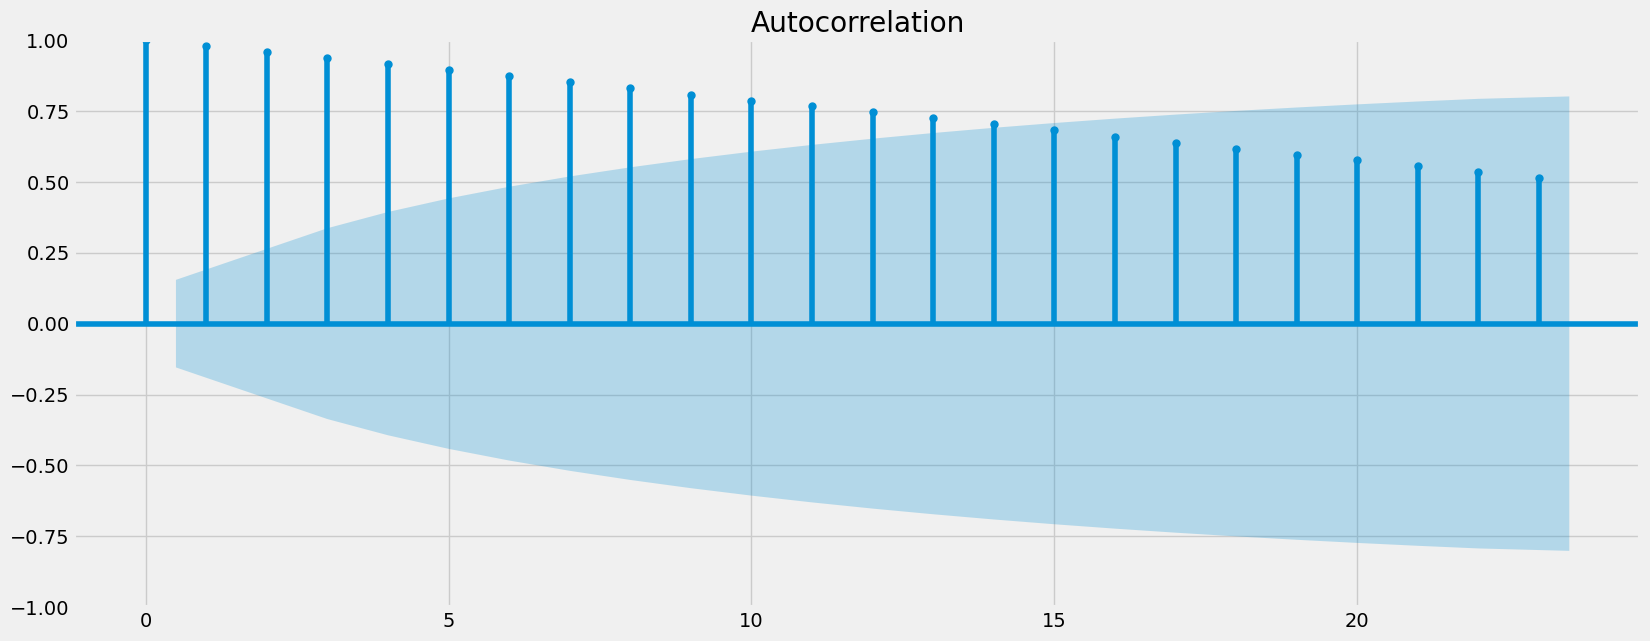

In [54]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

autocorr1= plot_acf(data_sub)
plt.show()

**The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means we have lags that are significantly correlated with each other. And when we have many lags beyond this interval, we can deduce that our data is non-stationary. As we can see from the above example, the ***(Federal Debt: Total Public Debt)*** time series has quite a few lags correlated with each other. This means there’s a lot of autocorrelated data and the set is likely non-stationary, which supports the result of the ***Dickey-Fuller test*** we conducted earlier.**

**Great! Now what? We’ve proven, basically beyond a doubt, that our data is non-stationary (has a trend), and since we know that we can’t forecast with non-stationary data, we first need to make it stationary. In order to do so, we’ll be running through some steps to extract the trend from our data by removing any unnecessary variance. 
Let’s take a look!**

In [56]:
# Exporting the visualization
autocorr1.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'Stationarizing1.png'))

### **5. Stationarizing the (Federal Debt: Total Public Debt) Data**

***let’s try putting some of the stationarizing techniques into practice on the (Federal Debt: Total Public Debt) data, starting with differencing.***

In [35]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [36]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [37]:
data_diff.head()

,Value
datetime,
1980-04-01,14163.0
1980-07-01,30087.0
1980-10-01,22509.0
1981-01-01,34321.0
1981-04-01,6643.0


In [38]:
data_diff.columns

Index(['Value'], dtype='object')

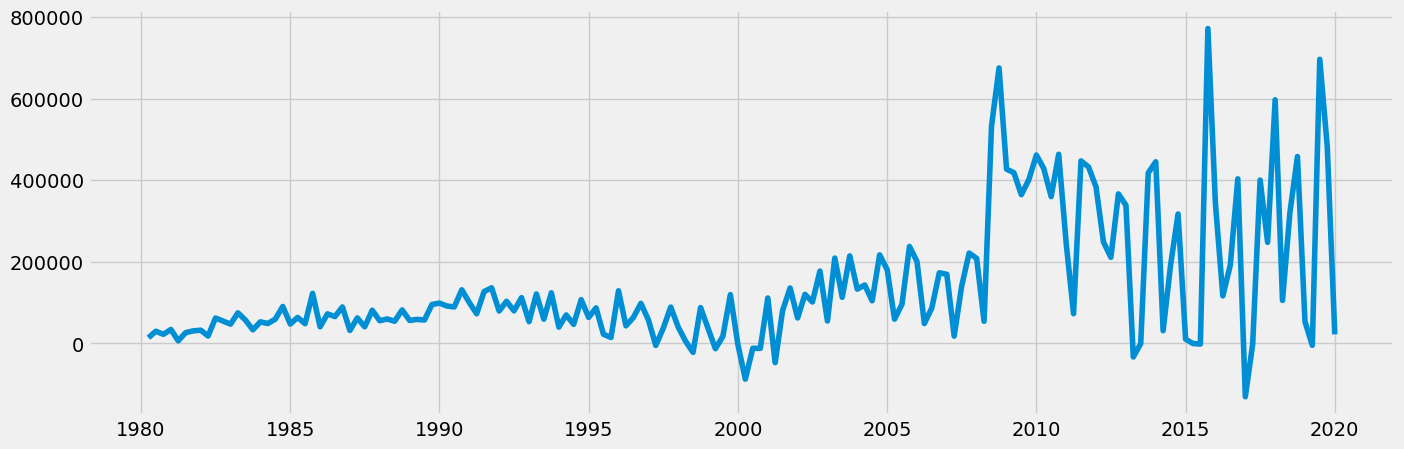

In [57]:
# Check out what the differencing did to the time-series curve

stationarizing= plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [58]:
# Exporting the visualization
stationarizing.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'stationarizing2.png'))

In [43]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.495316
p-value                          0.535827
Number of Lags Used             10.000000
Number of Observations Used    149.000000
Critical Value (1%)             -3.475018
Critical Value (5%)             -2.881141
Critical Value (10%)            -2.577221
dtype: float64


***Our test statistic is still larger than the critical value at all the three (1 %), (5 %) and (10 %)significance levels. We also dont have have a satisfactory p-value. This means we can not reject the null hypothesis and, as a result, consider our series is still none- stationary.***

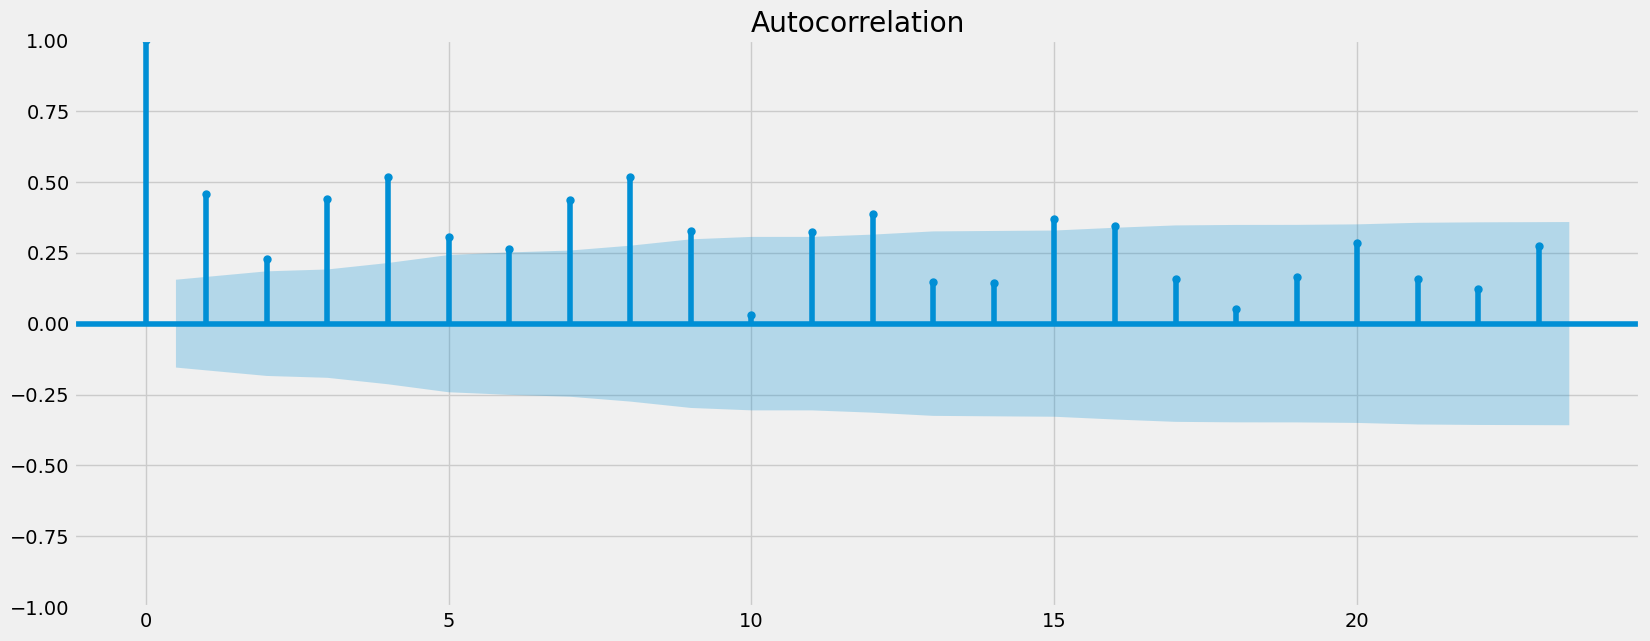

In [59]:
autocorr2= plot_acf(data_diff)
plt.show()

***The autocorrelation plot doesnt show  any significant improvements as well.  (there are still more autocorrelated terms). This means that our data is not stationary. So we can conduct anothr round of differencing to stationarize the data further and reduce the remaining autocorrelated terms.*** 

In [60]:
# Exporting the visualization
autocorr2.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'autocorrelation 2.png'))

### **We should conduct another round of differencing to stationarize our data**

In [45]:
data_diff2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [46]:
data_diff2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [47]:
data_diff2.head()

,Value
datetime,
1980-07-01,15924.0
1980-10-01,-7578.0
1981-01-01,11812.0
1981-04-01,-27678.0
1981-07-01,20038.0


In [48]:
data_diff2.columns

Index(['Value'], dtype='object')

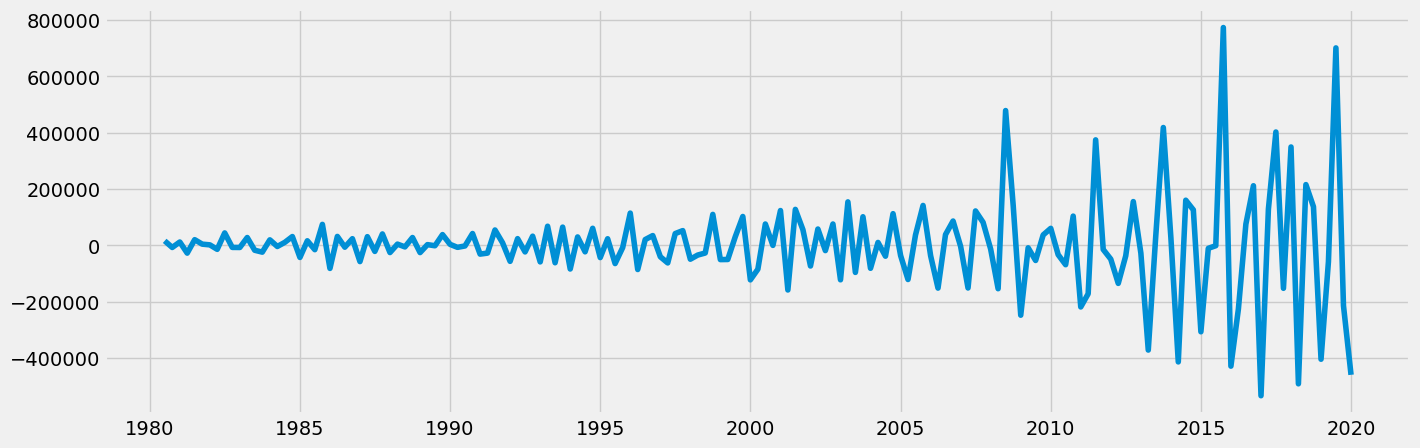

In [49]:
# Check out what the second round differencing did to the time-series curve

time2= plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [61]:
# Exporting the visualization
stationarizing.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'timeseries2.png'))

In [50]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.741923
p-value                          0.000070
Number of Lags Used              9.000000
Number of Observations Used    149.000000
Critical Value (1%)             -3.475018
Critical Value (5%)             -2.881141
Critical Value (10%)            -2.577221
dtype: float64


#### ***Success! Our test statistic is now smaller than the critical value at (1%),(5%)and (10%) significance levels. We also have a satisfactory p-value (p<0.05). This means we can reject the null hypothesis and, as a result, consider our series stationary.***

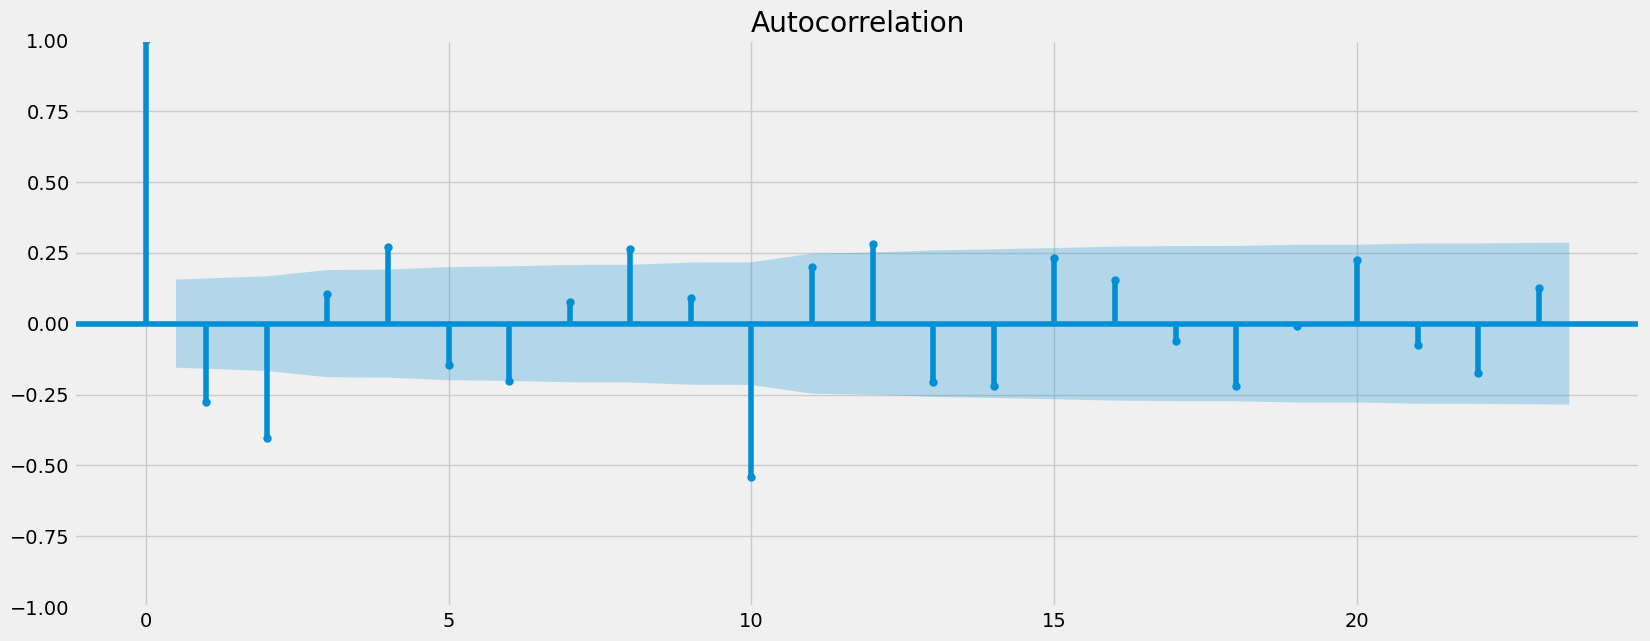

In [52]:
autocorr= plot_acf(data_diff2)
plt.show()

In [53]:
# Exporting the visualization
autocorr.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'autocorrelation.png'))

##### While the autocorrelation plot has improved (there are fewer autocorrelated terms), it’s still not perfect. This means that, despite the Dickey-Fuller test saying that our data is stationary, that stationarity is weak. If we wanted, we could conduct another round of differencing to stationarize it further and reduce the remaining autocorrelated terms, but we can stop here. This is because of the unspoken rule of thumb that we need at least ten significant lags (or ten vertical lines above the confidence interval) for conducting a next round of differencing to be necessary.